 # 퀴즈 : 호랑이, 사자 

In [1]:
import os
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input

## sklearn 의 분류기를 케라스 분류기로 인식해줌
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# model 불러오기
from tensorflow.keras.models import load_model
# 이미지 어쩌고 모델
from tensorflow.keras.applications import  VGG16

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline
plt.style.use('ggplot')

# 폴더 별로 이미지 로드

In [2]:
dataGen = image.ImageDataGenerator(rescale=1./255,)
imgGen = dataGen.flow_from_directory('download/', 
                                     target_size=(98,98), batch_size=1000)

Found 1599 images belonging to 2 classes.


800개 800개인데왜 1599라뜨는거지

In [3]:
 x_data, y_data = imgGen.next()

In [4]:
imgGen.class_indices

{'lion': 0, 'tiger': 1}

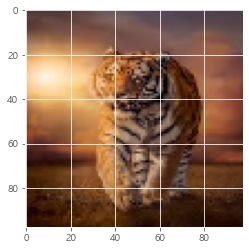

In [5]:
plt.imshow(x_data[0])
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25,stratify=y_data)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 98, 98, 3), (250, 98, 98, 3), (750, 2), (250, 2))

# 전이학습

## ResNet50 model  특징 추출기까지만 불러온다

In [7]:
model_conv = ResNet50(weights='imagenet',include_top=False, input_shape=(98,98,3))


In [8]:
model_conv.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 98, 98, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 104, 104, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 49, 49, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 49, 49, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# model 학습
model = Sequential()
model.add(model_conv)
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['acc'])
h = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 32s 690ms/step - loss: 5.5823 - acc: 0.5107
Epoch 2/100
24/24 [==============================] - 28s 1s/step - loss: 1.5547 - acc: 0.5520
Epoch 3/100
 8/24 [=========>....................] - ETA: 16s - loss: 1.0268 - acc: 0.5312

# 손실 정확도 비교

In [ ]:
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['acc'], label='acc')
plt.legend()
plt.show()

# train,test 정확도 f1 confusion


### train


In [ ]:
accuracy_score(y_train.argmax(axis=1), model.predict(x_train).argmax(axis=1))

In [ ]:
f1_score(y_train.argmax(axis=1), model.predict(x_train).argmax(axis=1), average='macro')

In [ ]:

trainM = confusion_matrix(y_train.argmax(axis=1), model.predict(x_train).argmax(axis=1))

In [ ]:
sns.heatmap( trainM,annot=True , fmt ='d',cmap='Reds'
)

## test

In [ ]:
accuracy_score(y_test.argmax(axis=1), model.predict(x_test).argmax(axis=1))

In [ ]:
f1_score(y_test.argmax(axis=1), model.predict(x_test).argmax(axis=1), average='macro')

In [ ]:
testM = confusion_matrix(y_test.argmax(axis=1), model.predict(x_test).argmax(axis=1))

In [ ]:
plt.figure(f)
sns.heatmap( testM,annot=True , fmt ='d',cmap='Reds' ,xticklabels=['lion','tiger'],yticklabels=['lion','tiger'])